In [24]:
#contours-
#less density of lines (less closeness of lines) higher is the slope
#thickness of lines also matter in contour plots


In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.spatial.distance import mahalanobis

(array([[  4.,   2.,   4.,   5.,  10.,  13.,  15.,  38.,  52.,  62.,  76.,
         113., 170., 162., 209., 242., 282., 331., 380., 412., 464., 525.,
         524., 527., 517., 564., 535., 507., 492., 428., 419., 333., 296.,
         274., 209., 191., 160., 118.,  90.,  63.,  55.,  31.,  33.,  21.,
          10.,  10.,   7.,   5.,   6.,   0.,   1.,   1.,   0.,   1.,   0.,
           0.,   0.,   0.,   0.,   1.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   2.,   7.,   4.,
          16.,   8.,  19.,  29.,  33.,  38.,  90.,  79., 116., 158., 213.,
         222., 253., 323., 382., 401., 419., 494., 488., 512., 547., 537.,
         550., 546., 484., 453., 463., 359., 304., 296., 242., 222., 168.,
         131.,  99.,  89.,  58.,  41.,  35.,  20.,  18.,   7.,   8.,   7.,
           5.,   1.,   1.,   0.,   1.]]),
 array([-2.43137282, -2.29331949, -2.15526616, -2.01721283, -1.8791595 ,
        -1.74110617, -1.60305284, -1.46499951, -1.32694618, -1.18889285,
        -1.05083951, -

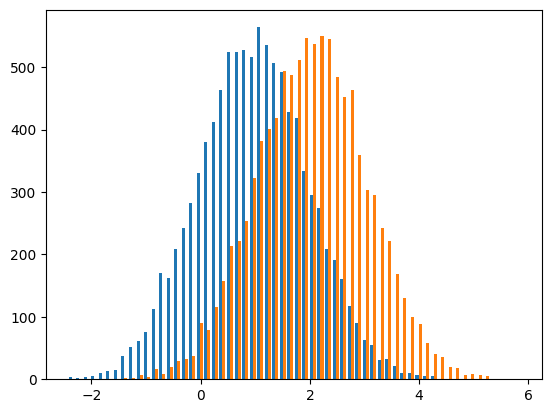

In [26]:
#Descriptive Plots

mean1 = (1, 2)
cov1 = [[1, 0], [0, 1]]


rng = np.random.default_rng()
x = rng.multivariate_normal(mean1, cov1, size=10000)
x1, x2 = x[:, 0], x[:, 1]


plt.hist(x,bins=60)


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x210e845e9e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x210e8580e50>,
 'cmins': <matplotlib.collections.LineCollection at 0x210e85813f0>,
 'cbars': <matplotlib.collections.LineCollection at 0x210e8581a20>}

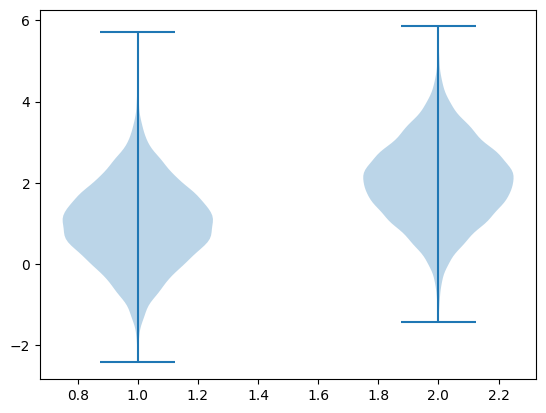

In [27]:
plt.violinplot(x)

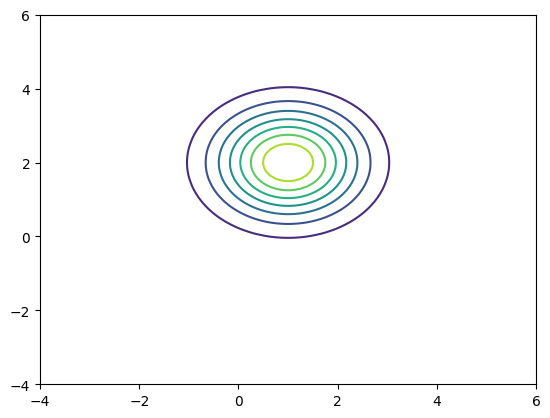

In [28]:
# Create a grid
X = np.linspace(-4, 6, 100)
Y = np.linspace(-4, 6, 100)
X, Y = np.meshgrid(X, Y)
pos = np.dstack((X, Y))

Z = multivariate_normal(mean=mean1, cov=cov1).pdf(pos)

plt.contour(X, Y, Z)

{'whiskers': [<matplotlib.lines.Line2D at 0x210e86650c0>,
 'caps': [<matplotlib.lines.Line2D at 0x210e86656c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x210e8664dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x210e8665cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x210e8665fc0>,
 'means': []}

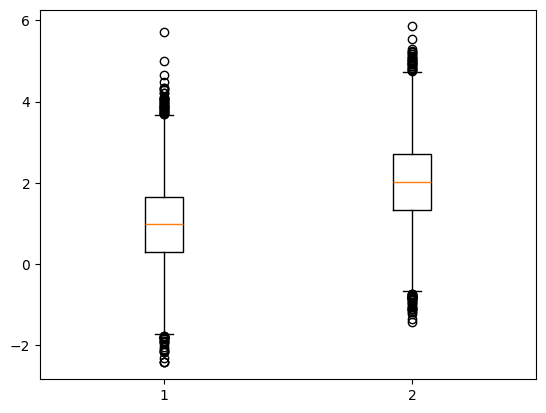

In [29]:
plt.boxplot([x1,x2])

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+01,
        7.400e+01, 2.470e+02, 6.820e+02, 1.278e+03, 1.791e+03, 2.066e+03,
        1.794e+03, 1.139e+03, 5.970e+02, 2.260e+02, 6.600e+01, 1.700e+01,
        2.000e+00]),
 array([-4.        , -3.47368421, -2.94736842, -2.42105263, -1.89473684,
        -1.36842105, -0.84210526, -0.31578947,  0.21052632,  0.73684211,
         1.26315789,  1.78947368,  2.31578947,  2.84210526,  3.36842105,
         3.89473684,  4.42105263,  4.94736842,  5.47368421,  6.        ]),
 <BarContainer object of 19 artists>)

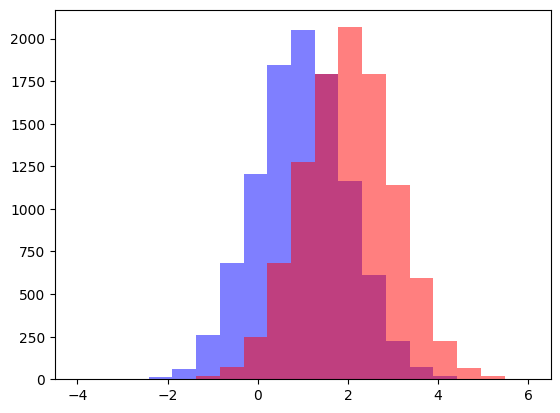

In [30]:
bins = np.linspace(-4, 6, 20)  # Define bins for histogram
plt.hist(x1, bins, alpha=0.5, label="X1", color="blue")
plt.hist(x2, bins, alpha=0.5, label="X2", color="red")


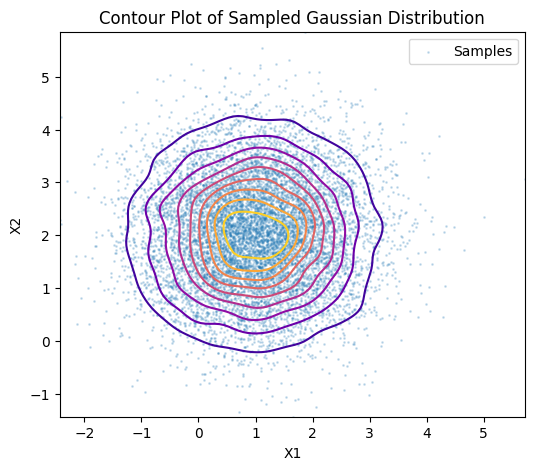

In [31]:
# Create density estimate
kde = gaussian_kde([x1, x2])
xi, yi = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(x2), max(x2), 100))
pos = np.vstack([xi.ravel(), yi.ravel()])
z = kde(pos).reshape(xi.shape)

plt.figure(figsize=(6, 5))
plt.contour(xi, yi, z, levels=10, cmap='plasma')
plt.scatter(x1, x2, alpha=0.2, s=1, label='Samples')
plt.title('Contour Plot of Sampled Gaussian Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

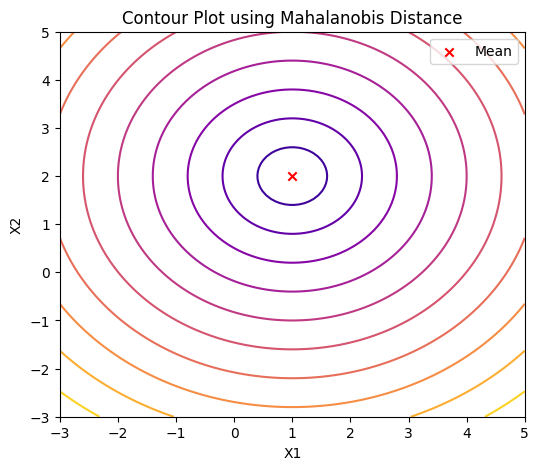

In [32]:
# Contour plot using Mahalanobis distance
# Contour Plots for Gaussian Distribution:
# Visualize Gaussian distributions in contour plots where each contour represents equal Mahalanobis distance from the mean.
x_vals, y_vals = np.meshgrid(np.linspace(-3, 5, 100), np.linspace(-3, 5, 100))
points = np.column_stack((x_vals.ravel(), y_vals.ravel()))

cov_inv = np.linalg.inv(cov1)
mahal_dist = np.array([mahalanobis(point, mean1, cov_inv) for point in points]).reshape(x_vals.shape)

plt.figure(figsize=(6, 5))
plt.contour(x_vals, y_vals, mahal_dist, levels=10, cmap='plasma')
plt.scatter(mean1[0], mean1[1], color='red', marker='x', label='Mean')
plt.title('Contour Plot using Mahalanobis Distance')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()



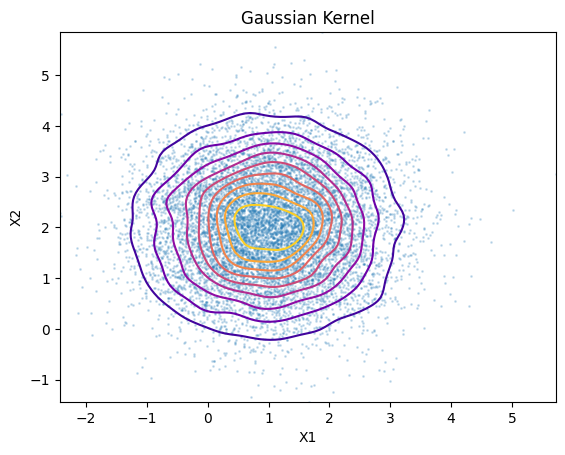

In [33]:


# Create density estimate using Gaussian kernel
kde_gaussian = gaussian_kde([x1, x2])
xi, yi = np.meshgrid(np.linspace(min(x1), max(x1), 100), np.linspace(min(x2), max(x2), 100))
pos = np.vstack([xi.ravel(), yi.ravel()])
z_gaussian = kde_gaussian(pos).reshape(xi.shape)





plt.contour(xi, yi, z_gaussian, levels=10, cmap='plasma')
plt.scatter(x1, x2, alpha=0.2, s=1, label='Samples')
plt.title('Gaussian Kernel')
plt.xlabel('X1')
plt.ylabel('X2')


plt.show()


Text(0, 0.5, 'X2')

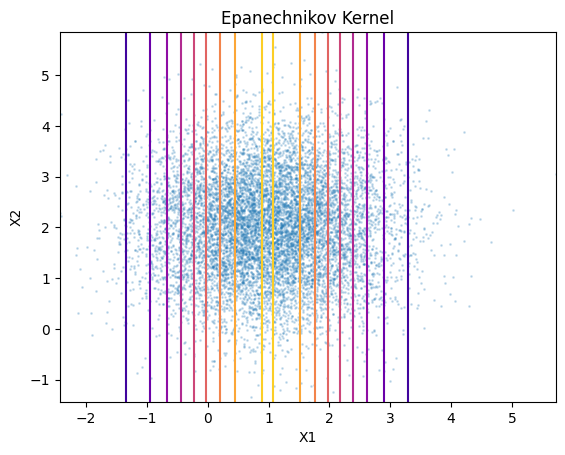

In [37]:
# Create density estimate using Epanechnikov kernel
def epanechnikov_kernel(x):
    return 0.75 * (1 - x**2) if np.abs(x) <= 1 else 0

def epanechnikov_kde(data, x):
    bandwidth = 1.0
    density = 0
    for di in data:
        density += epanechnikov_kernel((x - di) / bandwidth)
    return density / (len(data) * bandwidth)

z_epanechnikov = np.zeros(xi.shape)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        z_epanechnikov[i, j] = epanechnikov_kde(x1, xi[i, j])

plt.contour(xi, yi, z_epanechnikov, levels=10, cmap='plasma')
plt.scatter(x1, x2, alpha=0.2, s=1, label='Samples')
plt.title('Epanechnikov Kernel')
plt.xlabel('X1')
plt.ylabel('X2')


Text(0, 0.5, 'X2')

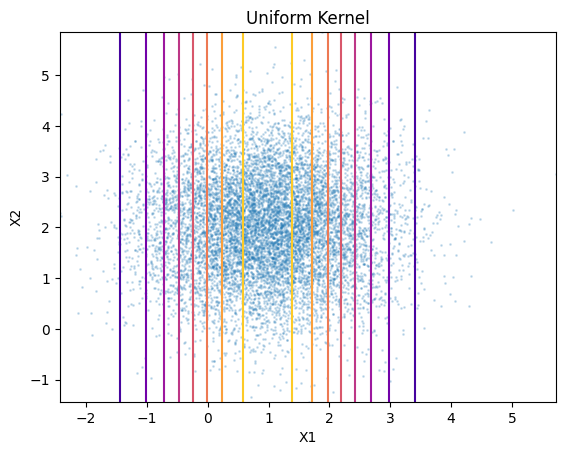

In [38]:
# Create density estimate using Uniform kernel
def uniform_kernel(x):
    return 1.0 if np.abs(x) <= 1 else 0

def uniform_kde(data, x):
    bandwidth = 1.0
    density = 0
    for di in data:
        density += uniform_kernel((x - di) / bandwidth)
    return density / (len(data) * bandwidth)

z_uniform = np.zeros(xi.shape)
for i in range(xi.shape[0]):
    for j in range(xi.shape[1]):
        z_uniform[i, j] = uniform_kde(x1, xi[i, j])

plt.contour(xi, yi, z_uniform, levels=10, cmap='plasma')
plt.scatter(x1, x2, alpha=0.2, s=1, label='Samples')
plt.title('Uniform Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
